# Investigate Titanic Data

The description of variables as provided by Kaggle:
https://www.kaggle.com/c/titanic

    VARIABLE DESCRIPTIONS:
    survival        Survival
                    (0 = No; 1 = Yes)
    pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    name            Name
    sex             Sex
    age             Age
    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    ticket          Ticket Number
    fare            Passenger Fare
    cabin           Cabin
    embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)

    SPECIAL NOTES:
    Pclass is a proxy for socio-economic status (SES)
     1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

    Age is in Years; Fractional if Age less than One (1)
     If the Age is Estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. sibsp and parch)
    some relations were ignored.  The following are the definitions used
    for sibsp and parch.

    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    Parent:   Mother or Father of Passenger Aboard Titanic
    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

    Other family relatives excluded from this study include cousins,
    nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
    only with a nanny, therefore parch=0 for them.  As well, some
    travelled with very close friends or neighbors in a village, however,
    the definitions do not support such relations.

## Preparetion data

In [1]:
# file location 
file_path = "./titanic_data.csv"

In [2]:
# import pandas
import numpy  as np
import pandas as pd

In [1]:
def get_dataframe(csv_file):
    '''read .csv file.

    parameters:
    -----------
    csv_file : a file path in csv format.
    
    return:
    -----------
    return pandas dataframe
    '''
    
    return pd.read_csv(csv_file)

In [4]:
def show_info(df, show_all):
    '''print the information.

    Parameters:
    -----------
    df       : a dataframe.
    show_all : a flage to print out info, if true print whole data, if false print first and last five row
    '''
    
    print "The information of dataframe\n"
    print df.info()
    print "-----------------------------------------------------------------------------\n"
    
    if show_all:
        print "DataFrame content"
        print df
        print "-----------------------------------------------------------------------------\n"
    else:
        print "First five row of DataFrame"
        print df.head()
        print "-----------------------------------------------------------------------------\n"
        print "Last five row of DataFrame"
        print df.tail()
        print "-----------------------------------------------------------------------------\n"
        
    print "The basical descriptive statistic"
    print df.describe()
    print "-----------------------------------------------------------------------------\n"
    

In [5]:
# open titanic dataset with pandas
titanic = get_dataframe(file_path)
titanic2 = get_dataframe(file_path)

In [6]:
# inspect the overall information of data
show_info(titanic, False)

The information of dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None
-----------------------------------------------------------------------------

First five row of DataFrame
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name    

## Question Phase

### Here's questions we'll try to answer from the dataset
    1.) Who are the passengers of Titanic?
    2.) How old are the passengers?
    3.) Where are the passengers came from?
    4.) Who are purchase expensive ticket?
    5.) Dose passenger class related with cabin position
    6.) Who are the passengers travel alone or travel with family?
    7.) What is the significant factors helped some passengers survive?

From dataset found 3 column had missing data "Age" -> missing 177 rows "Cabin" -> missing 687 rows "Embarked" -> missing 2 rows, let's start to fixed the missing data first

## Data Wrangling Phase

### Data cleaning

In [7]:
## Find the total number of rows and the number of unique students (account keys)
## in each table.

def count_passenger(df):
    '''
    find the total number of row in dataframe
    
    Parameters:
    -----------
    df  : a dataframe.
    
    return:
    -----------
    len(df) : data lenght
    '''
    
    return len(df)

In [8]:
def remove_column(df, key):
    '''
    drop list of key from dataframe, return dataframe that exclude that list key
    
    Parameters:
    -----------
    df  : a dataframe.
    key : a key to remove from dataframe
    
    return:
    -----------
    new_df : data frame without key
    '''
    
    new_df = df.copy()
    
    return new_df.drop(key, axis=1)

In [9]:
def had_family(df):
    '''
    Check is passenger travel with family or alone
    
    Parameters:
    -----------
    df  : a dataframe.
    
    return:
    -----------
    'With family' : if travel with family
    'Alone'       : if travel alone
    '''
        
    if df > 0:
        return 'With family'
    else:
        return 'Alone'

In [10]:
def had_alive(df):
    '''
    Check is passenger who alived or died
    
    Parameters:
    -----------
    df  : a dataframe.
    
    return:
    -----------
    'Alive' : if Survied = 1 
    'Died'  : if Survied = 0
    '''
        
    if df > 0:
        return "alive"
    else:
        return "died"

In [11]:
def had_class(df):
    '''
    Check is passenger class
    
    Parameters:
    -----------
    df  : a dataframe.
    
    return:
    -----------
    '1st class' : if Pclass = 1 
    '2nd class' : if Pclass = 2 
    '3rd class' : if Pclass = 3 
    '''
        
    if df == 1:
        return 'First'
    elif df == 2 :
        return 'Second'
    else:
        return 'Third'

In [12]:
# First let's make a function to sort through the sex 
def had_child(passenger):
    '''
    Treat passenger who age under 16 as a child
    
    Parameters:
    -----------
    passenger  : a objcect.
    
    return:
    -----------
    'child' : if age <= 15
    sex     : if age > 15
 
    '''
        
    # Take the Age and Sex
    age, sex = passenger

    if age <= 15:
        return 'Child'
    else:
        return sex

#### Fixed missing "Age" column

In [13]:
# find all the unique values for "Age"
print(titanic['Age'].unique())

[ 22.    38.    26.    35.      nan  54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.
  59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.
  55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.
  41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.
   0.75  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42
  34.5   74.  ]


In [14]:
# fill missing "Age" with mean
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# inspect dataset 
#show_info(titanic, True)

#### Fixed missing "Embarked" column

In [15]:
# find all the unique values for "Age"
print titanic['Embarked'].unique()

['S' 'C' 'Q' nan]


In [16]:
# the most common embarkation port is Southampton, so let's assume everyone got on there. 
# replace all the missing values in the Embarked column with S.
titanic['Embarked'] = titanic['Embarked'].fillna('S')

#### Fixed missing "Cabin" column

In [17]:
# find all the unique values for "Age"
print titanic['Cabin'].unique()

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']


In [18]:
# we see the "Cabin" show 687 missing rows, 
# assume passenger who held same ticket number should seat in same cabin

# loop through rows in datafram and fill Cabin
for i, row in titanic.iterrows():
    if pd.isnull(row['Cabin']):
        continue
    else:
        for j, row in titanic.iterrows():
            if pd.isnull(titanic.loc[j,'Cabin']):
                if titanic.loc[j,'Ticket'] == titanic.loc[i,'Ticket']:
                    titanic.loc[j,'Cabin'] = titanic.loc[i,'Cabin']
                    break

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#### Adding new column to dataframe

In [20]:
# add "Passenger" column represent who alive or died
titanic['Passenger'] = map(had_alive, titanic['Survived'])

In [21]:
# add "Gender" column these map Sex from text to number for future analysis
titanic['Gender'] = titanic['Sex'].map({'female' : 0, 'male' : 1}).astype(int)

In [22]:
# add "Who" column, to categorize passenger by group of male, female 
# and children as who under 15 as a child, 
titanic['Who'] = titanic[['Age','Sex']].apply(had_child, axis=1)

In [23]:
# add "Port" column these map each embarktation from text to number for future analysis
titanic['Port'] = titanic['Embarked'].dropna().map({'C' : 0, 'Q' : 1, 'S': 2 }).astype(int)

In [24]:
# add "Class" column represen clss of each passenger
titanic['Class'] = map(had_class, titanic['Pclass'])

In [25]:
# add "Family" column to represent passenger who travel alone or with their family
titanic['Family'] = map(had_family, titanic['Parch'] + titanic['SibSp'])

# drop "Parch" & "SibSp"
titanic = remove_column(titanic, ['Parch', 'SibSp'])

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Passenger,Gender,Who,Port,Class,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,NaN,S,died,1,male,2,Third,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,alive,0,female,0,First,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,NaN,S,alive,0,female,2,Third,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,alive,0,female,2,First,With family
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,NaN,S,died,1,male,2,Third,Alone


## Exploration Phase

In [27]:
# import library for the analysis and visualization
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from pandas.tools.plotting import scatter_matrix

sns.set(style="white")

%matplotlib inline

### Let's start answer the question

### 1.) Who are the passengers of Titanic?

### Investigate the dataset

In [28]:
# get total passenger
passengercount = float(len(titanic))

Who
Child      83
female    271
male      537
Name: Passenger, dtype: int64


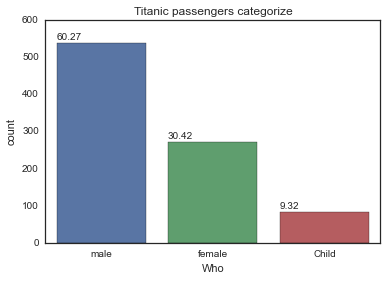

In [29]:
# Investigate who were the passenger

# show passenger count
passenger_by_who = titanic.groupby('Who')
print passenger_by_who.count()['Passenger']

# set plot title
sns.plt.title('Titanic passengers categorize')

# show the counts of passengers
ax = sns.countplot(x = 'Who', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 10, '%1.2f'%((height*100)/passengercount))

The most passengers were males, and show double of females

Who     Class 
Child   First       6
        Second     19
        Third      58
female  First      91
        Second     66
        Third     114
male    First     119
        Second     99
        Third     319
Name: Passenger, dtype: int64


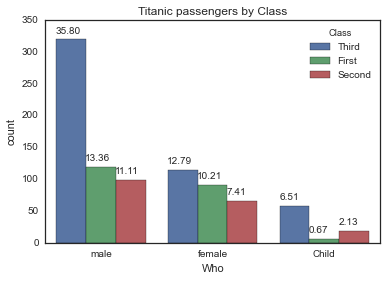

In [30]:
# Investigate who were the passenger

# show passenger count
passenger_by_who_class = titanic.groupby(['Who','Class'])
print passenger_by_who_class.count()['Passenger']

# set plot title
ax = sns.plt.title('Titanic passengers by Class')

# show the counts of passengers
ax = sns.countplot(x = 'Who', hue = 'Class', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 10, '%1.2f'%((height*100)/passengercount))

In the third class males were double of female and most child were in this class


### 2.) How old of the passengers?


In [31]:
# show passenger age
passenger_by_age_who = titanic.groupby(['Who'])
print passenger_by_age_who['Age'].mean()

Who
Child      6.369518
female    31.217712
male      31.978585
Name: Age, dtype: float64


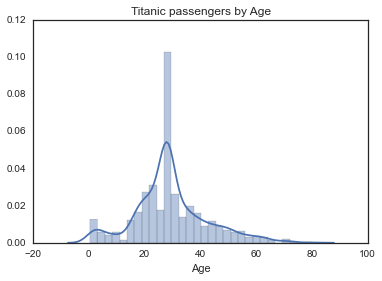

In [32]:
# quick look the distribution
ax = sns.distplot(titanic['Age'], hist = True)
# set plot title
ax = sns.plt.title('Titanic passengers by Age')

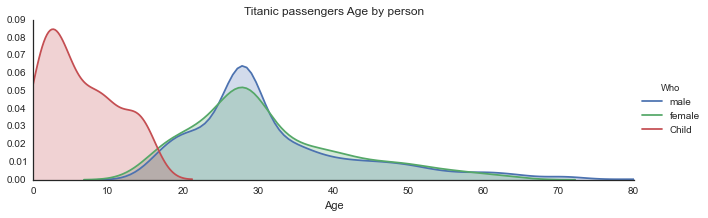

In [34]:
# check age for passenger by type

# faceplot by passenger type
ax = sns.FacetGrid(titanic, hue = 'Who', aspect = 3)
ax.map(sns.kdeplot,'Age',shade = True)
oldest = titanic['Age'].max()
ax.set(xlim = (0, oldest))
ax.add_legend();
# set title
ax = sns.plt.title('Titanic passengers Age by person')

Look at passenger gender, whom male and female aged were not difference

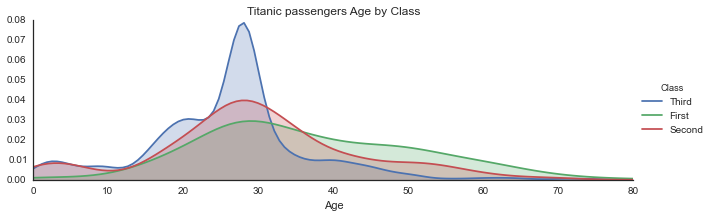

In [35]:
# check age for passenger by class

# faceplot by passenger type
ax = sns.FacetGrid(titanic, hue = 'Class', aspect = 3)
ax.map(sns.kdeplot,'Age',shade = True)
oldest = titanic['Age'].max()
ax.set(xlim=(0,oldest))
ax.add_legend();
# set title
ax = sns.plt.title('Titanic passengers Age by Class')

Passenger class look not difference for each class

### 3.) Where are the passengers came from?

In [36]:
# map Embarked port character to full name of each town
titanic['Embarked'] = titanic['Embarked'].dropna().map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S': 'Southampton' })


Embarked
Cherbourg      168
Queenstown      77
Southampton    646
Name: Passenger, dtype: int64


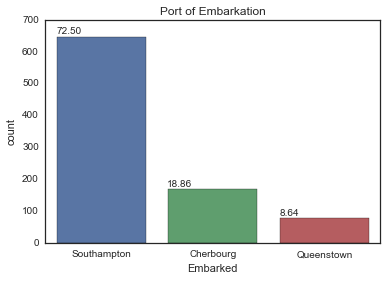

In [37]:
# Check passenger who from

passenger_by_embark_who = titanic.groupby('Embarked')
print passenger_by_embark_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Port of Embarkation')

# show the counts of passengers
ax = sns.countplot(x = 'Embarked', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 10, '%1.2f'%((height*100)/passengercount))

Embarked     Who   
Cherbourg    Child      18
             female     60
             male       90
Queenstown   Child       5
             female     35
             male       37
Southampton  Child      60
             female    176
             male      410
Name: Passenger, dtype: int64


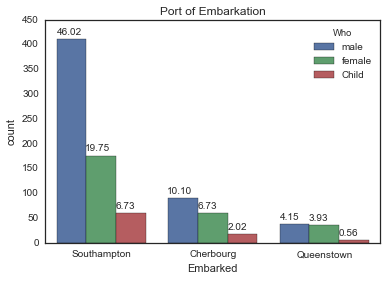

In [38]:
# Check passenger who from

passenger_by_embark_who = titanic.groupby(['Embarked','Who'])
print passenger_by_embark_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Port of Embarkation')

# show the counts of passengers
ax = sns.countplot(x = 'Embarked', hue = 'Who', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 10, '%1.2f'%((height*100)/passengercount))

Most passgeners came from Southampton, which number of males were double of female

Class   Embarked   
First   Cherbourg       85
        Queenstown       2
        Southampton    129
Second  Cherbourg       17
        Queenstown       3
        Southampton    164
Third   Cherbourg       66
        Queenstown      72
        Southampton    353
Name: Passenger, dtype: int64


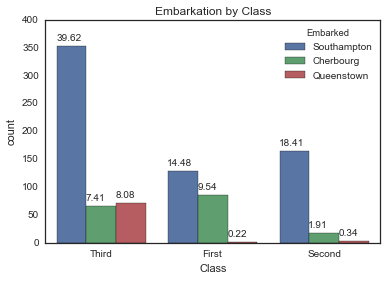

In [39]:
# quick look passenger embarktation

passenger_by_class_who = titanic.groupby(['Class','Embarked'])
print passenger_by_class_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Embarkation by Class')

# show the counts of passengers
ax = sns.countplot(x = 'Class', hue = 'Embarked', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 10, '%1.2f'%((height*100)/passengercount))

In Queentown, almost passengers that boarded there were third class.

## 4.) Who are purchase expensive ticket?

In [40]:
# quick check clss of embarked
group_by_ses_embark = titanic.groupby(['Embarked'])
print group_by_ses_embark['Fare'].agg([np.sum, np.max, np.min, np.mean, np.std])


                    sum      amax    amin       mean        std
Embarked                                                       
Cherbourg    10072.2962  512.3292  4.0125  59.954144  83.912994
Queenstown    1022.2543   90.0000  6.7500  13.276030  14.188047
Southampton  17599.3988  263.0000  0.0000  27.243651  35.952905


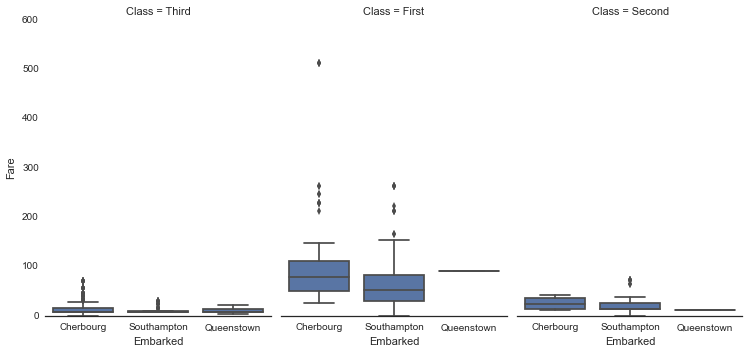

In [41]:
# plot distribution of ticket price
ax = sns.FacetGrid(titanic, col = 'Class', size = 5, aspect = 0.7)
(ax.map(sns.boxplot, 'Embarked', 'Fare')
 .despine(left = True));


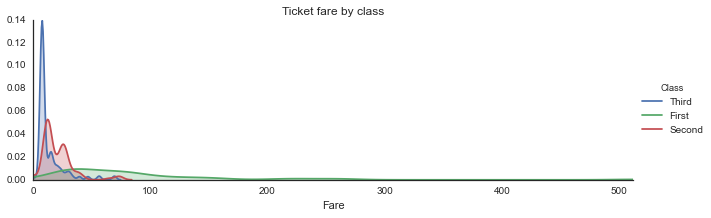

In [42]:
# check passengers fare for class
ax = sns.FacetGrid(titanic, hue = 'Class', aspect = 3)
ax.map(sns.kdeplot,'Fare', shade = True)
oldest = titanic['Fare'].max()
ax.set(xlim = (0,oldest))
ax.add_legend()
# set title
ax = sns.plt.title('Ticket fare by class')

First class fare was expensive than other class.

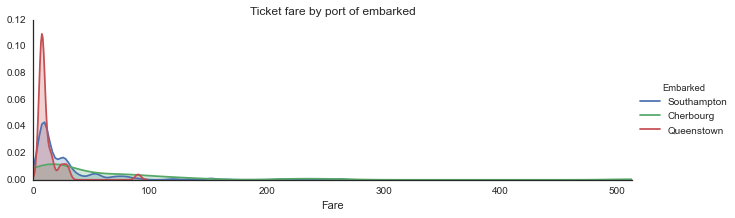

In [43]:
# check passengers fare by embarked
ax = sns.FacetGrid(titanic, hue = 'Embarked', aspect = 3)
ax.map(sns.kdeplot,'Fare',shade = True)
oldest = titanic['Fare'].max()
ax.set(xlim = (0,oldest))
ax.add_legend()
ax = sns.plt.title('Ticket fare by port of embarked')

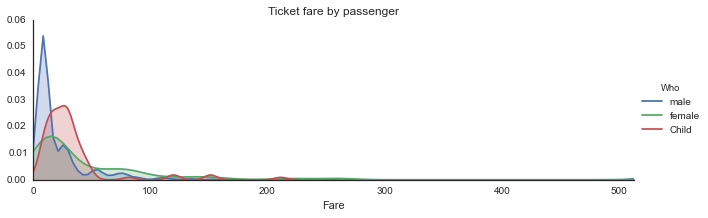

In [44]:
# check passengers fare by embarked
ax = sns.FacetGrid(titanic, hue = 'Who', aspect = 3)
ax.map(sns.kdeplot,'Fare',shade = True)
oldest = titanic['Fare'].max()
ax.set(xlim = (0,oldest))
ax.add_legend()
ax = sns.plt.title('Ticket fare by passenger')

Cheap fare most sold in Queenstown, look seem the economics of this town inwealthy

## 5.) Dose passenger class related with cabin position

In [45]:
# create a new datafram that rmove missing cabin
titanic_no_missing = titanic.dropna()

In [46]:
titanic_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 889
Data columns (total 16 columns):
PassengerId    215 non-null int64
Survived       215 non-null int64
Pclass         215 non-null int64
Name           215 non-null object
Sex            215 non-null object
Age            215 non-null float64
Ticket         215 non-null object
Fare           215 non-null float64
Cabin          215 non-null object
Embarked       215 non-null object
Passenger      215 non-null object
Gender         215 non-null int64
Who            215 non-null object
Port           215 non-null int64
Class          215 non-null object
Family         215 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 28.6+ KB


In [52]:
# grab only letter for the cabin position
for i, x in titanic_no_missing['Cabin'].iteritems():
    titanic_no_missing.loc[i,('Cabin')] = x[0]

#print titanic_no_missing['Cabin']

In [53]:
# Quick preview of the cabin position
titanic_no_missing.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Passenger,Gender,Who,Port,Class,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,Cherbourg,alive,0,female,0,First,With family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C,Southampton,alive,0,female,2,First,With family
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,17463,51.8625,E,Southampton,died,1,male,2,First,Alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,PP 9549,16.7000,G,Southampton,alive,0,Child,2,Third,With family
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,113783,26.5500,C,Southampton,alive,0,female,2,First,Alone


In [54]:
# get total cabin passenger 
cabincount = float(len(titanic_no_missing))

Cabin
A    15
B    48
C    67
D    33
E    33
F    14
G     4
Name: Passenger, dtype: int64


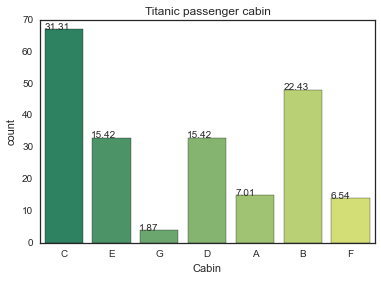

In [55]:
# quick look cabin row

passenger_by_class_who = titanic_no_missing.groupby('Cabin')
print passenger_by_class_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Titanic passenger cabin')

# show the counts of passengers
ax = sns.countplot(x = 'Cabin',data = titanic_no_missing, palette='summer')

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height, '%1.2f'%((height*100)/cabincount))

In [56]:
# look at cabin row T was out of group, so redefine cabin data again
titanic_no_missing = titanic_no_missing[titanic_no_missing['Cabin'] != 'T']

Cabin
A    15
B    48
C    67
D    33
E    33
F    14
G     4
Name: Passenger, dtype: int64


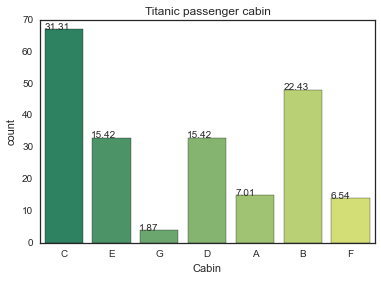

In [57]:
# plot cabin position

passenger_by_class_who = titanic_no_missing.groupby('Cabin')
print passenger_by_class_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Titanic passenger cabin')

# show the counts of passengers
ax = sns.countplot(x = 'Cabin',data = titanic_no_missing, palette='summer')

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height, '%1.2f'%((height*100)/cabincount))

Class   Cabin
First   A        15
        B        48
        C        67
        D        29
        E        25
Second  D         4
        E         5
        F         8
Third   E         3
        F         6
        G         4
Name: Passenger, dtype: int64


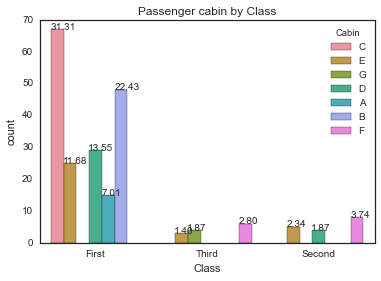

In [58]:
# check position by passengers class
passenger_by_class_who = titanic_no_missing.groupby(['Class', 'Cabin'])
print passenger_by_class_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Passenger cabin by Class')
# show the counts of passengers
ax = sns.countplot(x = 'Class', hue = 'Cabin', data = titanic_no_missing)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    if math.isnan(height):
        continue

    else:
        ax.text(p.get_x(), height, '%1.2f'%((height*100)/cabincount))
        #continue

Embarked     Cabin
Cherbourg    A         7
             B        23
             C        26
             D        13
             E         5
             F         2
Queenstown   C         2
             E         1
             F         1
Southampton  A         8
             B        25
             C        39
             D        20
             E        27
             F        11
             G         4
Name: Passenger, dtype: int64


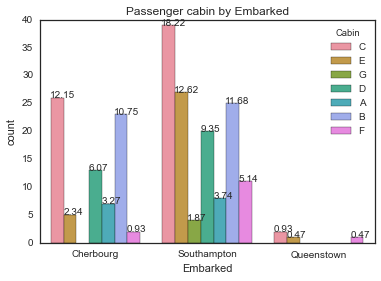

In [59]:
# check cabin position by port of embarkation
passenger_by_class_who = titanic_no_missing.groupby(['Embarked', 'Cabin'])
print passenger_by_class_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Passenger cabin by Embarked')
# show the counts of passengers
ax = sns.countplot(x = 'Embarked', hue = 'Cabin', data = titanic_no_missing)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    if math.isnan(height):
        continue

    else:
        ax.text(p.get_x(), height, '%1.2f'%((height*100)/cabincount))
        #continue

Who     Cabin
Child   A         1
        B         3
        C         2
        E         1
        F         4
        G         2
female  A         1
        B        26
        C        32
        D        18
        E        15
        F         5
        G         2
male    A        13
        B        19
        C        33
        D        15
        E        17
        F         5
Name: Passenger, dtype: int64


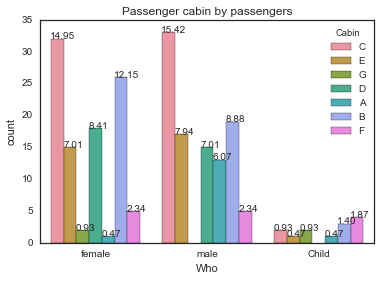

In [60]:
# check cabin position by passenger
passenger_by_class_who = titanic_no_missing.groupby(['Who', 'Cabin'])
print passenger_by_class_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Passenger cabin by passengers')
# show the counts of passengers
ax = sns.countplot(x = 'Who', hue = 'Cabin', data = titanic_no_missing)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    if math.isnan(height):
        continue

    else:
        ax.text(p.get_x(), height, '%1.2f'%((height*100)/cabincount))
        #continue

From data, the passengers on 1st class almost on cabin row A, B, C and D,
Almost passenger from Queentown were on cabin row E and F

## 6.) Who are the passengers travel alone or travel with family?

In [61]:
# check to make sure it worked
titanic['Family'].count()

891

Family
Alone          537
With family    354
Name: Passenger, dtype: int64


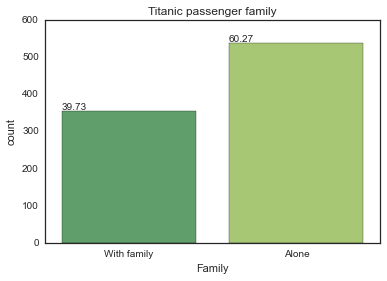

In [62]:
# plot cabin position

passenger_by_class_who = titanic.groupby('Family')
print passenger_by_class_who.count()['Passenger']

# set plot title
ax = sns.plt.title('Titanic passenger family')

# show the counts of passengers
ax = sns.countplot(x = 'Family',data = titanic, palette='summer')

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 5, '%1.2f'%((height*100)/passengercount))

Look like almost of passengers their were travel alone

Who     Family     
Child   Alone            6
        With family     77
female  Alone          121
        With family    150
male    Alone          410
        With family    127
Name: Passenger, dtype: int64


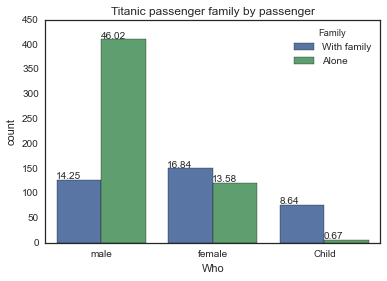

In [63]:
# plot cabin position

passenger_by_class_who = titanic.groupby(['Who', 'Family'])
print passenger_by_class_who.count()['Passenger']


    # set plot title
ax = sns.plt.title('Titanic passenger family by passenger')
# show the counts of passengers
ax = sns.countplot(x = 'Who', hue = 'Family', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 2, '%1.2f'%((height*100)/passengercount))

Embarked     Family     
Cherbourg    Alone           85
             With family     83
Queenstown   Alone           57
             With family     20
Southampton  Alone          395
             With family    251
Name: Passenger, dtype: int64


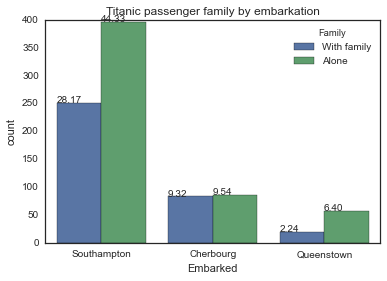

In [64]:
# plot cabin position

passenger_by_class_who = titanic.groupby(['Embarked', 'Family'])
print passenger_by_class_who.count()['Passenger']


    # set plot title
ax = sns.plt.title('Titanic passenger family by embarkation')
# show the counts of passengers
ax = sns.countplot(x = 'Embarked', hue = 'Family', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 1, '%1.2f'%((height*100)/passengercount))

Class   Family     
First   Alone          109
        With family    107
Second  Alone          104
        With family     80
Third   Alone          324
        With family    167
Name: Passenger, dtype: int64


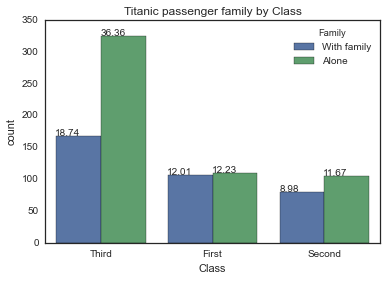

In [65]:
# plot cabin position

passenger_by_class_who = titanic.groupby(['Class', 'Family'])
print passenger_by_class_who.count()['Passenger']


    # set plot title
ax = sns.plt.title('Titanic passenger family by Class')
# show the counts of passengers
ax = sns.countplot(x = 'Class', hue = 'Family', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 1, '%1.2f'%((height*100)/passengercount))

From this result, most alone passengers were male.
Passenger who from Southampton were travel alone 

### 7.) What is the  factors helped some passengers survive?

Passenger
alive    342
died     549
Name: Survived, dtype: int64


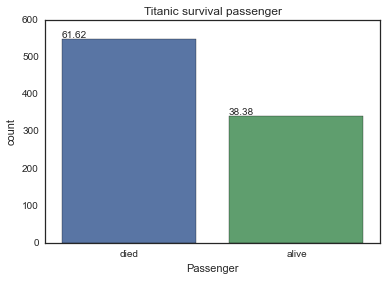

In [66]:
# check survial rate
passenger_by_class_who = titanic.groupby('Passenger')
print passenger_by_class_who.count()['Survived']

# set plot title
ax = sns.plt.title('Titanic survival passenger')
# show the counts of passengers
ax = sns.countplot(x = 'Passenger', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 2, '%1.2f'%((height*100)/passengercount))

Look seem a few more passenger died than those who survived.

Let's take a look which variables had an effect on their survival rate

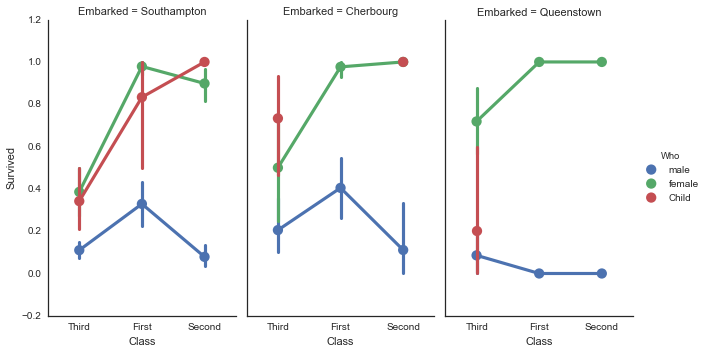

In [67]:
# plot survival probability against several variables
ax = sns.factorplot(x = 'Class', y = 'Survived', 
                   hue = 'Who', col = 'Embarked',
                   data = titanic, size = 5, aspect = .6)

The survival rates for men are too lower than women and child for all class and embarked.
The 3rd class women passenger survival rates look like it lowest than other class.
The 2nd class men like survival rates very low thand other class.

From this data the result is show that being a male in any class dramatically decreases a chances of survival.

In [68]:
# set range of age for linear plot
age_range = [10,20,40,60,80]

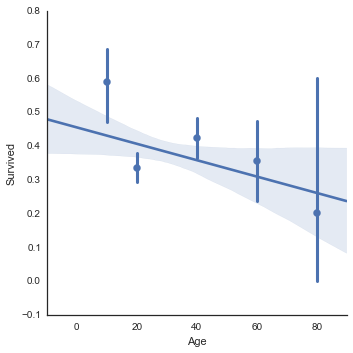

In [69]:
# looking age versus survival by linear plot
ax = sns.lmplot('Age','Survived',
               data = titanic, palette = 'winter', 
               x_bins = age_range)

Looks like there is a formal trend that an older passenger less survival rate.

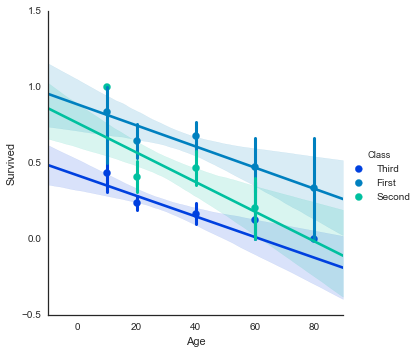

In [70]:
# how about survival rate if relate class and age
# use use linear plot on age versus survival by each class
ax = sns.lmplot('Age', 'Survived', hue ='Class', 
               data = titanic, palette = 'winter', 
               x_bins = age_range)

This result show that being a first class in any age dramatically increases a chances of survival.

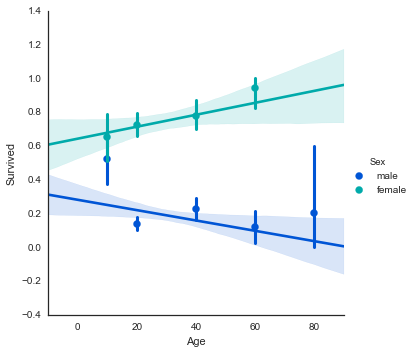

In [71]:
# what about if relate gender and age effect survival rate?
ax = sns.lmplot('Age', 'Survived', hue = 'Sex', 
               data = titanic, palette = 'winter', 
               x_bins = age_range)

Look like that being a male in any age will decreases a chances of survival.

From the result is show that being a male in any age will lowest a chances of survival.

Now investigate what about ticket fare relate survival rate ?

In [72]:
# set range of price
farerange = [0,250,500,750,1000]

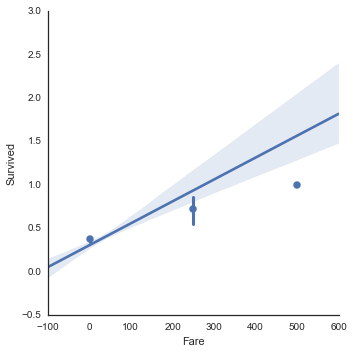

In [73]:
# plot data of fare versus survival
ax = sns.lmplot('Fare', 'Survived', data = titanic, 
               palette = 'winter', x_bins = farerange)

Look like higher fare will increase chance of survival rate, this maybe related with 1st class passenger have higher survived

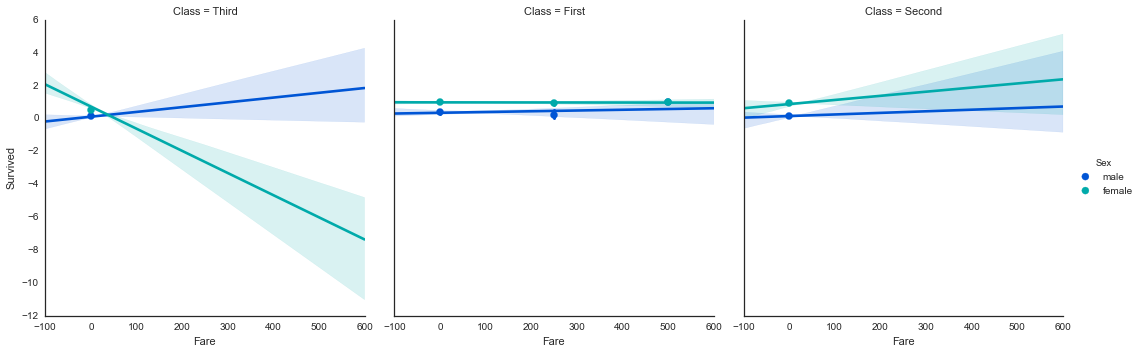

In [74]:
# check survived rate relate fare by gender
ax = sns.lmplot('Fare', 'Survived', hue = 'Sex',  col = 'Class',
               data = titanic, palette = 'winter', 
               x_bins = farerange)

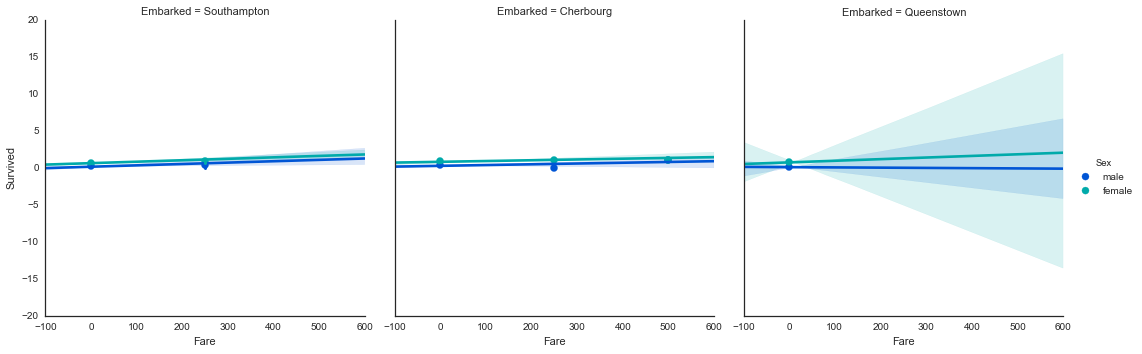

In [75]:
# check survived rate relate fare by gender
ax = sns.lmplot('Fare', 'Survived', hue = 'Sex',  col = 'Embarked',
               data = titanic, palette = 'winter', 
               x_bins = farerange)

From the result, look seek, higher fare may little bit increased survival chance

Now, how if passenger who travel with family will increase chance of survival?

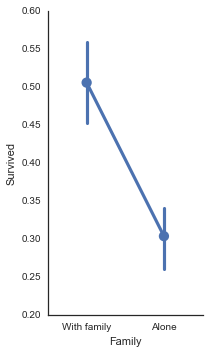

In [76]:
# how about survival rate if relate with family or alone
ax = sns.factorplot(x = 'Family', y = 'Survived', 
                   data = titanic, size = 5, aspect = .6)

Wow!, interesting result, faminly passenger show hight survived than who alone.

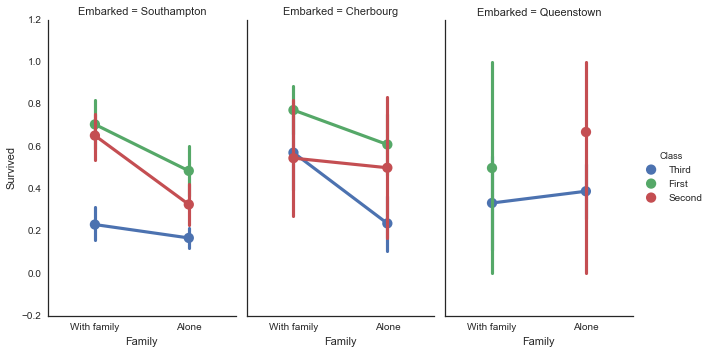

In [77]:
# how about survival rate if relate with family or alone
ax = sns.factorplot(x = 'Family', y = 'Survived', 
                   hue = 'Class', col = 'Embarked',
                   data = titanic, size = 5, aspect = .6)

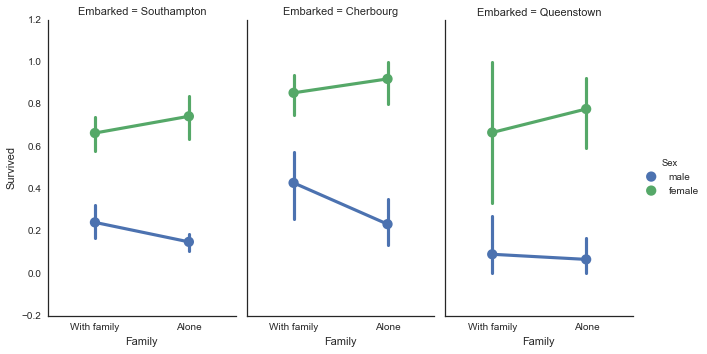

In [78]:
# how about survival rate of each gender who with family or alone 
ax = sns.factorplot(x = 'Family', y = 'Survived', 
                   hue = 'Sex', col = 'Embarked',
                   data = titanic, size = 5, aspect = .6)

Look like passenger who travel with family have increased survival rate even being male.

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following questions using pandas and seaborn:
1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
2.) Did having a family member increase the odds of surviving the crash?
Feel free to post a discussion if you get stuck or have more ideas!

Now remain the cabin position data, it relate to survived? 

Now, how if passenger who travel with family will increase chance of survival?

Cabin
A    15
B    48
C    67
D    33
E    33
F    14
G     4
Name: Survived, dtype: int64


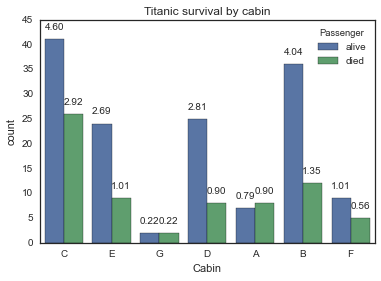

In [79]:
# plot cabin position

passenger_by_class_who = titanic_no_missing.groupby('Cabin')
print passenger_by_class_who.count()['Survived']

# set plot title
ax = sns.plt.title('Titanic survival by cabin')
# show the counts of passengers
ax = sns.countplot(x = 'Cabin', hue = 'Passenger', data = titanic_no_missing)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 2, '%1.2f'%((height*100)/passengercount))

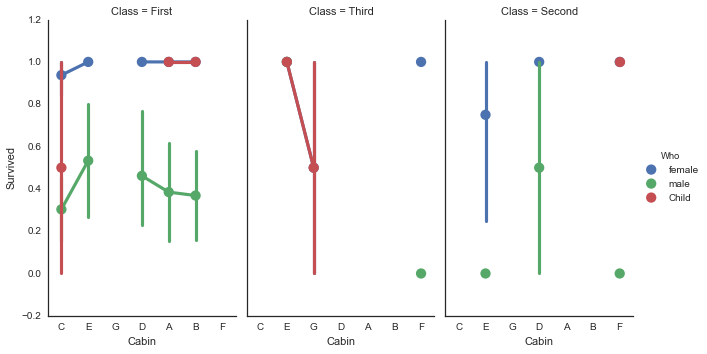

In [80]:
# how about survival rate of each gender who with family or alone 
ax = sns.factorplot(x = 'Cabin', y = 'Survived', 
                   hue = 'Who', col = 'Class',
                   data = titanic_no_missing, size = 5, aspect = .6)

From the data it looks like cabin B, C, D have higher survived, this maybe almost passenger 1st class were on these cabin

## Conclusion phase

### Now here are the answer of these question

#### 1.) Who are the passengers of Titanic?
    - Alost passengers were males
      Ratio of passgeners wer male ~60%, female ~30% and child ~10% 

#### 2.) How old are the passengers?
    - Age of passengers were males
      Child     6.369518 yr.
      female    31.217712 yr.
      male      31.978585 yr.
    - There were distributed age for all class

#### 3.) Where are the passengers came from?
    - Most passengers cam from Southampton
      Southampton    72%
      Cherbourg      19%
      Queenstown      9%
    - Almost male passengers cam from this port ~46%
    - Almost Queentowm passengers on 3rd class
    - Almost Cherbourg passengers on 1st class

#### 4.) Who are purchase expensive ticket?
    - Most 1st class passenger who purchase higher ticket
    - Passenger from Cherbourg who purchase higher ticket
                        sum      amax    amin       mean        std
        Cherbourg    10072.2962  512.3292  4.0125  59.954144  83.912994
        Southampton  17599.3988  263.0000  0.0000  27.243651  35.952905
        Queenstown    1022.2543   90.0000  6.7500  13.276030  14.188047

#### 5.) Dose passenger class related with cabin position
     - The passengers on 1st class almost on cabin row A, B, C and D,
     - Almost passenger from Queentown were on cabin row E and F

#### 6.) Who are the passengers travel alone or travel with family?
     - Most alone passengers were male.
     - Passenger who from Southampton were travel alone.
     - Passenger who from Cherbourg were most travel with family

#### 7.) What is the significant factors helped some passengers survive?
     - The first most factor of survival is genger being a female increases a chances of survival.
     - The second factor is age, youngest passenger may increase a chances of survival.
     - The third factor is passenger class, the 1st class passengers who will have more chance to surived, this also related to cabin position and fare.

## Reference
    - https://www.kaggle.com/c/titanic
    - https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
    - http://pandas.pydata.org/pandas-docs/stable/10min.html
    - http://pandas.pydata.org/pandas-docs/stable/tutorials.html
    - http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html
    - https://docs.scipy.org/doc/numpy-dev/user/quickstart.html